# Fourth homework for computational mathematics course

In [2]:
import numpy as np
import pylab as plt
import random
import time

## Eexrsice 1

In [7]:
def matrix_generate(rows, columns, type_ = "full", eps = 0):
    """
    matrix_generate(rows, columns, type_ = "full")
    
    Создаёт случайную матрицу выбранного типа. 
    
    Если матрицу нужных размеров создать нельзя должен выдать
    строку f"Error with type {type_} and shape ({rows},{columns})".
    
    Parameters
    ----------
    
    rows : int
        Количество строк в создаваемой матрице.
    columns : int
        Количество столбцов в создаваемой матрице.
    type_ : str, optional
        Тип создаваемой матрицы: "full", "upper_triangular", "symmetric" и т.д.
    eps: float, optional
        Дополнительное число, использующееся при генерации для некоторых типов матриц.
    
    Returns
    -------
    out : ndarray or str
        Выдаёт матрицу нужного типа либо ошибку.
        
    Notes
    -----
    Поддерживаемые типы матриц:
        "full","upper_triangular",
        "symmetric",
        ...
    
    
    """
    
    if type_ == "full":
        return np.random.random(size=(rows, columns))
        
    elif type_ == "upper_triangular":
        A = np.random.random(size=(rows, columns))

        for i in range(rows):
            for j in range(columns):
                if (i > j):
                    A[i, j] = 0
        return A
    
    elif type_ == "lower_triangular":
        A = np.random.random(size=(rows, columns))

        for i in range(rows):
            for j in range(columns):
                if (i < j):
                    A[i, j] = 0
        return A
        
    elif type_ == "symmetric":
        A = np.random.random(size=(rows, columns))
        return A + A.T
    
    elif type_ == "diagonal":
        return np.diag(np.random.rand(rows))
    
    elif type_ == "degenerate":
        A = np.random.random(size=(rows, columns - 1))
        lcolumn = np.zeros(rows)
        for column in A.T:
            lcolumn += random.random()*column
        return np.concatenate((A, lcolumn.reshape(rows, 1)), axis=1)
    
    elif type_ == "diagonal":
        return np.diag(np.random.rand(rows))
    
    elif type_ == "perturbation":
        A = np.random.random(size=(rows, columns))
        return eps * A
    
    elif type_ == "step":
        A = matrix_generate(columns, rows-columns, type_ = "upper_triangular", eps = 0)
        B = matrix_generate(columns, columns, type_ = "full", eps = 0)
        C = np.zeros((rows-columns, rows))
        return np.concatenate((np.concatenate((A, B), axis=1), C), axis=0)

In [8]:
A = matrix_generate(3, 2, type_ = "step", eps = 0.5)
A

array([[0.60839148, 0.23345051, 0.47765981],
       [0.        , 0.4234377 , 0.66921635],
       [0.        , 0.        , 0.        ]])

## Exercise 2

In [3]:
x = np.random.rand(100)
M = np.random.rand(100, 100)

def L1_vec (x):
    return np.sum(np.abs(x))

def L2_vec (x):
    return np.sqrt(np.sum(x**2))

def Inf_vec (x):
    return np.max(np.abs(x))

def L1_mat (x):
    return Inf_mat(x.T)

def L2_mat (x):
    return np.sqrt(np.max(np.linalg.eigvals(x.T@x)))

def Inf_mat (x):
    return np.max(np.sum(np.abs(x), axis=0))

def mu(x, norm):
    return norm(x)*norm(np.linalg.inv(x))
    
                   

print('Vector l1 norm: ', L1_vec(x))
print('Vector l2 norm: ', L2_vec(x))
print('Vector inf norm: ', Inf_vec(x))
print('Matrix l1 norm: ', L1_mat(M))
print('Matrix l2 norm: ', L2_mat(M))
print('Matrix inf norm: ', Inf_mat(M))
print(mu(M, Inf_mat))

Vector l1 norm:  54.70617066061566
Vector l2 norm:  6.084793658612598
Vector inf norm:  0.9832817555442266
Matrix l1 norm:  56.91250477881499
Matrix l2 norm:  50.2246219102942
Matrix inf norm:  57.204152699533395
6160.853874337608


## Exercise 3

In [5]:
def Gauss(matrix):
#     boolin = False
#     if np.shape(matrix)[0] > np.shape(matrix)[1]:
#         boolin = True
#         matrix = matrix.T
        
    for nrow in range(np.min([np.shape(matrix)[0], np.shape(matrix)[1]])):
        # nrow равен номеру строки
        # np.argmax возвращает номер строки с максимальным элементом в уменьшенной матрице
        # которая начинается со строки nrow. Поэтому нужно прибавить nrow к результату
        pivot = nrow + np.argmax(abs(matrix[nrow:, nrow]))
        if pivot != nrow:
            # swap
            # matrix[nrow], matrix[pivot] = matrix[pivot], matrix[nrow] - не работает.
            # нужно переставлять строки именно так, как написано ниже
            matrix[[nrow, pivot]] = matrix[[pivot, nrow]]
        row = matrix[nrow]
        divider = row[nrow] # диагональный элемент
        if abs(divider) != 0:
            # почти нуль на диагонали. Продолжать не имеет смысла, результат счёта неустойчив
        # делим на диагональный элемент.
            row /= divider
            # теперь надо вычесть приведённую строку из всех нижележащих строчек
            for lower_row in matrix[nrow+1:]:
                factor = lower_row[nrow] # элемент строки в колонке nrow
                lower_row -= factor*row # вычитаем, чтобы получить ноль в колонке nrow
    # приводим к диагональному виду
    make_identity(matrix)
    
#     if boolin:
#         matrix = matrix.T
#         mat = []
#         for nrow in range(np.shape(matrix)[0] - np.shape(matrix)[1]):
#             mat.append(matrix[len(matrix) - 1 - nrow])
#         for nrow in range(np.shape(matrix)[1]):
#             mat.append(matrix[nrow])
#         matrix = np.array(mat)
    return matrix

def with_rang(size_x, size_y, rang):
    gen = np.random.rand(rang, rang)
    for i in range(size_y - rang):
        vec = random.random() * gen[:, 0]
        for j in range(1, rang):
            vec += random.random() * gen[:, i]
        gen = np.concatenate((gen, vec.reshape(rang, 1)), axis=1)
        
    for i in range(size_x - rang):
        vec = random.random() * gen[0, :]
        for j in range(1, rang):
            vec += random.random() * gen[i, :]
        gen = np.concatenate((gen, vec.reshape(1, size_y)), axis=0)
    
    return gen

def rank(A):
    A = Gauss(A)
    A = Gauss(A.T)
    return np.sum(np.sum(A))

def make_identity(matrix):
    for nrow in range(np.min([np.shape(matrix)[0], np.shape(matrix)[1]])-1,0,-1):
        row = matrix[nrow]
        for upper_row in matrix[:nrow]:
            factor = upper_row[nrow]
            upper_row -= factor*row
    return matrix

In [6]:
M = np.random.rand(2,2)
L = np.random.rand(7,4)
N = np.concatenate((M, M), axis=1)
Gauss(L)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [-0., -0., -0.,  1.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

## Exercise 4

In [9]:
def makeTrianglePivot(matrix):
    for nrow in range(len(matrix)):
        # nrow равен номеру строки
        # np.argmax возвращает номер строки с максимальным элементом в уменьшенной матрице
        # которая начинается со строки nrow. Поэтому нужно прибавить nrow к результату
        pivot = nrow + np.argmax(abs(matrix[nrow:, nrow]))
        if pivot != nrow:
            # swap
            # matrix[nrow], matrix[pivot] = matrix[pivot], matrix[nrow] - не работает.
            # нужно переставлять строки именно так, как написано ниже
            # matrix[[nrow, pivot]] = matrix[[pivot, nrow]]
            matrix[nrow], matrix[pivot] = matrix[pivot], np.copy(matrix[nrow])
        row = matrix[nrow]
        divider = row[nrow] # диагональный элемент
        if abs(divider) < 1e-10:
            # почти нуль на диагонали. Продолжать не имеет смысла, результат счёта неустойчив
            raise ValueError("Матрица несовместна")
        # делим на диагональный элемент.
        row /= divider
        # теперь надо вычесть приведённую строку из всех нижележащих строчек
        for lower_row in matrix[nrow+1:]:
            factor = lower_row[nrow] # элемент строки в колонке nrow
            lower_row -= factor*row # вычитаем, чтобы получить ноль в колонке nrow
    return matrix

def gaussSolvePivot(A, b=None):
    """Решает систему линейных алгебраических уравнений Ax=b
    Если b is None, то свободные коэффициенты в последней колонке"""
    shape = A.shape
    assert len(shape) == 2, ("Матрица не двумерная", shape) # двумерная матрица
    A = A.copy()
    if b is not None:
        assert shape[0] == shape[1], ("Матрица не квадратная", shape)
        assert b.shape == (shape[0],), ("Размерность свободных членов не соответствует матрица", shape, b.shape)
        # добавляем свободные члены дополнительным столбцом
        A = np.c_[A, b]
    else:
        # Проверяем, что квадратная плюс столбец
        assert shape[0]+1 == shape[1], ("Неверный формат матрицы", shape)
    makeTrianglePivot(A)
    makeIdentity(A)
    return A[:,-1]

def makeIdentity(matrix):
    # перебор строк в обратном порядке 
    for nrow in range(len(matrix)-1,0,-1):
        row = matrix[nrow]
        for upper_row in matrix[:nrow]:
            factor = upper_row[nrow]
            # вычитать строки не нужно, так как в row только два элемента отличны от 0:
            # в последней колонке и на диагонали
            
            # вычитание в последней колонке
            upper_row[-1] -= factor*row[-1]
            # вместо вычитания 1*factor просто обнулим коэффициент в соотвествующей колонке. 
            upper_row[nrow] = 0
    return matrix

1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901


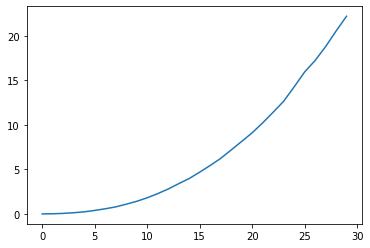

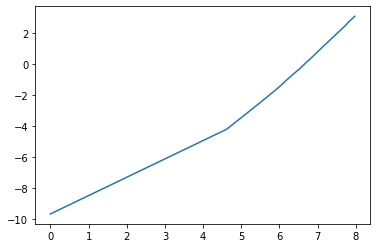

In [4]:
times = []
for i in range(1, 3000, 100):
    matrix = np.random.rand(i, i+1)
    start = time.time()
    gaussSolvePivot(matrix)
    end = time.time()
    times.append(end-start)
    print(i)

x = np.arange(1, 3000, 100)
plt.plot(times)
plt.show()
plt.plot(np.log(x), np.log(times))
plt.show()

In [11]:
A = np.random.rand(3,3)
b = np.random.rand(3)
x = gaussSolvePivot(A, b)
vec = A@x - b
vec

array([ 1.11022302e-16, -1.11022302e-16, -1.11022302e-16])